# Telemetry

## Pulse Code Modulation (PCM)



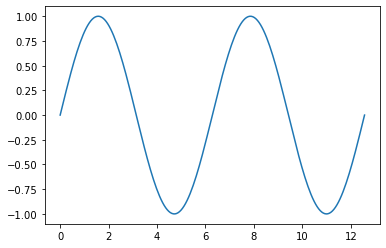

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import time

phase_accum = np.linspace(0, 4 * np.pi, 200)

y = np.sin(phase_accum)

plt.ion()

fig, ax = plt.subplots()
line1, = ax.plot(phase_accum, y)
plt.axes(ax)

for phase_offset in np.linspace(0, 2 * np.pi, 50):
    phase = phase_accum + phase_offset
    line1.set_ydata(np.sin(phase))
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(10/1000)


# plt.show()  # not needed if ion (interactive mode) is set

## Phase Shift Keying (PSK)
As opposed to Amplitude Shift Keying (ASK), Frequency Shift Keying (FSK), or On/Off Keying (OOK). 

PSK is the same as Phase Modulation.

Good intro to the concept here:
https://www.electronics-notes.com/articles/radio/modulation/phase-modulation-what-is-pm-tutorial.php

Helpful visualization from [wikipedia](https://en.wikipedia.org/wiki/Phase_modulation):
![Phase Modulation](375px-Phase-modulation.gif)


### Binary PSK (BPSK) vs Quaternary PSK (QPSK)

#### BPSK aka Differential PSK (DPSK)
A.k.a 2-phase PSK or Phase Reversal Keying

[PSK Basics Article](https://www.tutorialspoint.com/digital_communication/digital_communication_phase_shift_keying.htm)  
[Wikipedia](https://en.wikipedia.org/wiki/Phase-shift_keying#Binary_phase-shift_keying_(BPSK))  

Each 1 bit reverses the phase

![Binary Phase Shift Keying](./bspk_modulated_output_wave.jpg)

#### QPSK 

[Reference Article](https://www.allaboutcircuits.com/technical-articles/quadrature-phase-shift-keying-qpsk-modulation/)  
[Wikipedia](https://en.wikipedia.org/wiki/Phase-shift_keying#Quadrature_phase-shift_keying_(QPSK))  

QPSK transmits 2 bits per symbol.  
A QPSK symbol doesn’t represent 0 or 1—it represents 00, 01, 10, or 11.

![QPSK symbols](200px-QPSK_Gray_Coded.svg.png)
Constellation diagram for QPSK with Gray coding. Each adjacent symbol only differs by one bit.

The four QPSK phase shifts are 45°, 135°, 225°, and 315°.

![QPSK Phase Shifts](TB_QPSK_1.webp)

Summing I and Q signals that are either inverted or noninverted results in these four phase shifts.

![QPSK Phase Combinations](TB_QPSK_2.webp)

$\displaystyle s_{n}(t)={\sqrt {\frac {2E_{s}}{T_{s}}}}\cos \left(2\pi f_{c}t+(2n-1){\frac {\pi }{4}}\right),\quad n=1,2,3,4$

This yields the four phases π/4, 3π/4, 5π/4 and 7π/4 as needed.

This results in a two-dimensional signal space with unit basis functions:

$\displaystyle {\begin{aligned}\phi _{1}(t)&amp;={\sqrt {\frac {2}{T_{s}}}}\cos \left(2\pi f_{c}t\right)\\\phi _{2}(t)&amp;={\sqrt {\frac {2}{T_{s}}}}\sin \left(2\pi f_{c}t\right)\end{aligned}}$

The first basis function is used as the in-phase component of the signal and the second as the quadrature component of the signal.

Hence, the signal constellation consists of the signal-space 4 points

$\begin{pmatrix}\pm {\sqrt {\frac {E_{s}}{2}}}&amp;\pm {\sqrt {\frac {E_{s}}{2}}}\end{pmatrix}$

The factors of 1/2 indicate that the total power is split equally between the two carriers.

![QPSK Implementation](600px-Transmisor_QPSK_2.png)

#### OQPSK (Offset Quadrature Phase Shift Keying)

[Wikipedia](https://en.wikipedia.org/wiki/Phase-shift_keying#Offset_QPSK_(OQPSK))  

Offsets the phase of the two channels by half the symbol size.

![OQPSK Timing Diagram](OQPSK_timing_diagram.png)

This keeps a maximum of 90 degrees phase shift instead of 180 that's possible with QPSK.  It results in lower amplitude jumps between symbols.  

#### SOQPSK (Shaped Offset Quadrature Phase Shift Keying)

[IJESIT Article](http://www.ijesit.com/Volume%202/Issue%202/IJESIT201302_59.pdf)  

Smooths the phase shifts between symbols, so that it moves smoothly between symbols on the phase circle instead of jumping.

This is broadly classified as Continuous Phase Modulation (CPM).  

Need:
"modulation schemes that introduce phase discontinuities will tend to
introduce undesirable frequency side lobes when amplified through a non–linear amplifier. However, linear
amplifiers are less power efficient (transmitted power versus power supplied) than non–linear amplifiers."




#### Other
DQPSK - [Differential QPSK](https://www.allaboutcircuits.com/technical-articles/differential-quadrature-phase-shift-keying-dqpsk-modulation/)  

CQPSK - Coherent QPSK - demodulator must extract the reference wave from the signal and compare each symbol to it.  DQPSK compares each symbol to the previous symbol. DQPSK is easier to implement, but has more demodulation errors. 
